<a href="https://colab.research.google.com/github/helmana/DLeeg/blob/master/Test/REO_64_109.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
'''

109 subject
64 channel 
task: REO

layers: 3 conv2D(3,3) & maxpooling(2,2) - 1 Dense(512)
epoch: 30 
batch size: 20

'''

import matplotlib

from matplotlib import pyplot as plt
import numpy as np

import math

from tensorflow import keras
from tensorflow.keras.utils import to_categorical

import random
import mne
from mne.preprocessing import create_ecg_epochs, create_eog_epochs
from mne import io
from mne import viz
#from mne.datasets import testing
from mne import Epochs, io, pick_types
from mne.event import define_target_events
from mne.time_frequency import psd_welch
print(__doc__)

c:\users\user\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
c:\users\user\appdata\



109 subject
64 channel 
task: REO

layers: 3 conv2D(3,3) & maxpooling(2,2) - 1 Dense(512)
epoch: 30 
batch size: 20




In [2]:
subject_number=109
task_number = 1 # task: REO
ch_number = 4
task_time = 60

sampel_number_per_sec =  160 # sampel rate
total_sampel_number =  sampel_number_per_sec *task_time # 60*160
sample_shift = 4 #step len
window_len= 20



In [3]:


# load dataset in array
list_raw_fnames = [[0]*task_number]*subject_number
for x in range(subject_number):
    list_raw_fnames[x] = mne.datasets.eegbci.load_data(x+1,[1])

list_rawdata = np.zeros((subject_number,task_number), dtype='object')

for i in range(subject_number):
    for j in range(task_number):
        list_rawdata[i][j] = mne.io.read_raw_edf(list_raw_fnames[i][j], preload=True)


Extracting EDF parameters from C:\Users\User\mne_data\MNE-eegbci-data\physiobank\database\eegmmidb\S001\S001R01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 9759  =      0.000 ...    60.994 secs...
Extracting EDF parameters from C:\Users\User\mne_data\MNE-eegbci-data\physiobank\database\eegmmidb\S002\S002R01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 9759  =      0.000 ...    60.994 secs...
Extracting EDF parameters from C:\Users\User\mne_data\MNE-eegbci-data\physiobank\database\eegmmidb\S003\S003R01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 9759  =      0.000 ...    60.994 secs...
Extracting EDF parameters from C:\Users\User\mne_data\MNE-eegbci-data\physiobank\database\eegmmidb\S004\S004R01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 9759  =      

Extracting EDF parameters from C:\Users\User\mne_data\MNE-eegbci-data\physiobank\database\eegmmidb\S033\S033R01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 9759  =      0.000 ...    60.994 secs...
Extracting EDF parameters from C:\Users\User\mne_data\MNE-eegbci-data\physiobank\database\eegmmidb\S034\S034R01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 9759  =      0.000 ...    60.994 secs...
Extracting EDF parameters from C:\Users\User\mne_data\MNE-eegbci-data\physiobank\database\eegmmidb\S035\S035R01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 9759  =      0.000 ...    60.994 secs...
Extracting EDF parameters from C:\Users\User\mne_data\MNE-eegbci-data\physiobank\database\eegmmidb\S036\S036R01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 9759  =      

Extracting EDF parameters from C:\Users\User\mne_data\MNE-eegbci-data\physiobank\database\eegmmidb\S065\S065R01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 9759  =      0.000 ...    60.994 secs...
Extracting EDF parameters from C:\Users\User\mne_data\MNE-eegbci-data\physiobank\database\eegmmidb\S066\S066R01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 9759  =      0.000 ...    60.994 secs...
Extracting EDF parameters from C:\Users\User\mne_data\MNE-eegbci-data\physiobank\database\eegmmidb\S067\S067R01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 9759  =      0.000 ...    60.994 secs...
Extracting EDF parameters from C:\Users\User\mne_data\MNE-eegbci-data\physiobank\database\eegmmidb\S068\S068R01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 9759  =      

Extracting EDF parameters from C:\Users\User\mne_data\MNE-eegbci-data\physiobank\database\eegmmidb\S097\S097R01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 9759  =      0.000 ...    60.994 secs...
Extracting EDF parameters from C:\Users\User\mne_data\MNE-eegbci-data\physiobank\database\eegmmidb\S098\S098R01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 9759  =      0.000 ...    60.994 secs...
Extracting EDF parameters from C:\Users\User\mne_data\MNE-eegbci-data\physiobank\database\eegmmidb\S099\S099R01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 9759  =      0.000 ...    60.994 secs...
Extracting EDF parameters from C:\Users\User\mne_data\MNE-eegbci-data\physiobank\database\eegmmidb\S100\S100R01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 9759  =      

In [4]:


# img for each one
subject_img_number = math.floor((total_sampel_number - sampel_number_per_sec) / sample_shift) +1 - window_len +1
test_start_index=subject_img_number - math.floor(subject_img_number * 0.15) 

train_number =  test_start_index 
test_number = subject_img_number - test_start_index
train_number*subject_number* 64* (window_len+1) * 160*4/1024/1024/1024

173.8509750366211

In [5]:
train_img = np.zeros((train_number*subject_number, ch_number, window_len + 1, 160), dtype = np.float32)
train_label =[]


test_img = np.zeros((test_number*subject_number, ch_number, window_len, 160), dtype = float)
test_label =[]


train_img.shape

(217019, 4, 21, 160)

In [6]:

def normalize_channel_data(ch , i, ch_min, ch_max):
  ch = ((ch - ch_min[i]) / (ch_max[i] - ch_min[i] ))
  return ch

In [7]:
list_rawdataTest=list_rawdata.copy()
for s in range(subject_number):
    
    DataChannelsRaw, times =list_rawdataTest[s][0][:64,:total_sampel_number]
    
    # make a copy
    DataChannelsRaw_t=DataChannelsRaw.copy()
    times_t=times.copy()
    
    # find min/max per channel
    ch_max =[]
    ch_min =[]
    for p in range(len(DataChannelsRaw_t)):
        ch_max = np.append(ch_max, max(DataChannelsRaw_t[p])) # max for each cannel
        ch_min = np.append(ch_min, min(DataChannelsRaw_t[p])) # min for each cannel
        
    # Normalize Channels
    DataChannelsNormal=np.zeros((ch_number,times.size),dtype = float)
    for i in range(ch_number):
        DataChannelsNormal[i]=normalize_channel_data(DataChannelsRaw_t[i], i, ch_min, ch_max)
        

    for j in range (subject_img_number):
        for i in range(ch_number):
            for z in range (window_len):
              
                ExtractedData = DataChannelsNormal[i,0+(j+z)*sample_shift:sampel_number_per_sec+(j+z)*sample_shift]
                if j <test_start_index :
                    train_img[s*train_number + j][i][z] = ExtractedData
                    if z==window_len-1 :
                          train_img[s*train_number + j][i][z+1] = s
                      
                      
                else:
                    test_img[s*test_number + j - test_start_index][i][z] = ExtractedData
        if j >=test_start_index :
              test_label = np.append(test_label, (s))

In [8]:
#shaffle train img array
train_img_shuffle = train_img#.copy()

np.random.shuffle(train_img_shuffle)

In [9]:
train_img_2 = np.zeros((train_number*subject_number, ch_number, window_len, 160), dtype = float)

# img label 
train_img_shuffle_len =len(train_img_shuffle)
for i in range(train_img_shuffle_len):
    train_label = np.append(train_label, (train_img_shuffle[i][0][window_len][0] ))
    for j in range (ch_number):
      train_img_2[i][j] = np.delete(train_img_shuffle[i][j], window_len, axis=0)

In [10]:

train_label = to_categorical(train_label, subject_number)
test_label = to_categorical(test_label, subject_number)

In [11]:
validation_index = math.floor( len(train_img_2) * 0.2)


# valid & train
x_train =train_img_2[validation_index:]
y_train =train_label[validation_index:]

x_valid =train_img_2[:validation_index]
y_valid =train_label[:validation_index]

x_valid.shape

(43403, 4, 20, 160)

In [12]:
from keras import layers
from keras import models
from keras import regularizers
from keras import optimizers

model = models.Sequential()
model.add(layers.Conv2D(64, (3,3), activation = 'relu', padding='same', input_shape = (ch_number,window_len,160), data_format= "channels_first" ))
print(model.output.shape)
model.add(layers.MaxPooling2D((2,2)))
print(model.output.shape)
model.add(layers.Conv2D(128, (3,3), activation = 'relu'))
print(model.output.shape)
model.add(layers.MaxPooling2D((2,2)))
print(model.output.shape)
model.add(layers.Conv2D(256, (3,3), activation = 'relu'))
print(model.output.shape)
model.add(layers.MaxPooling2D((2,2)))


model.add(layers.Flatten())
print(model.output.shape)
model.add(layers.Dense(512, activation = 'relu'))
model.add(layers.Dropout(0.5))
print(model.output.shape)
model.add(layers.Dense(subject_number, activation = 'softmax'))
print(model.output.shape)

#compile
model.compile(loss= 'categorical_crossentropy',
              optimizer= optimizers.RMSprop(lr= 1e-4),
              metrics = ['acc'])

(?, 64, 20, 160)

(?, 32, 10, 160)
(?, 30, 8, 128)
(?, 15, 4, 128)
(?, 13, 2, 256)
(?, ?)
(?, 512)
(?, 109)


Using TensorFlow backend.


In [13]:

,
history = model.fit(
        x_train,
        y_train,
        epochs = 50,
        batch_size = 20,
        validation_data = (x_valid, y_valid)
)


Train on 173616 samples, validate on 43403 samples
Epoch 1/50
173616/173616 [==============================] - 899s 5ms/step - loss: 2.3140 - acc: 0.4108 - val_loss: 0.9523 - val_acc: 0.7311
Epoch 2/50
173616/173616 [==============================] - 904s 5ms/step - loss: 0.8545 - acc: 0.7426 - val_loss: 0.4708 - val_acc: 0.8537
Epoch 3/50
173616/173616 [==============================] - 908s 5ms/step - loss: 0.4822 - acc: 0.8489 - val_loss: 0.2408 - val_acc: 0.9269
Epoch 4/50
173616/173616 [==============================] - 916s 5ms/step - loss: 0.3303 - acc: 0.8944 - val_loss: 0.1912 - val_acc: 0.9389
Epoch 5/50
173616/173616 [==============================] - 916s 5ms/step - loss: 0.2570 - acc: 0.9169 - val_loss: 0.1206 - val_acc: 0.9642
Epoch 6/50
173616/173616 [==============================] - 919s 5ms/step - loss: 0.2142 - acc: 0.9305 - val_loss: 0.1229 - val_acc: 0.9594
Epoch 7/50
173616/173616 [==============================] - 920s 5ms/step - loss: 0.1914 - acc: 0.9390 - val

In [14]:
model.metrics_names

['loss', 'acc']

In [15]:
model.evaluate(test_img, test_label)


38259/38259 [==============================] - 55s 1ms/step


[1.1276990042502495, 0.9058783650398254]

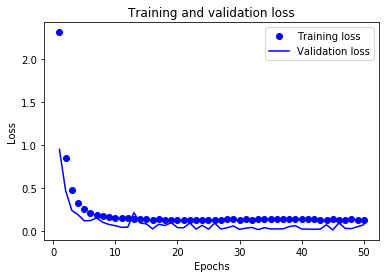

In [16]:
import matplotlib.pyplot as plt

history_dict = history.history 

loss_values = history_dict ['loss'] 

val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)



plt.plot(epochs, loss_values, 'bo', label='Training loss') 

plt.plot(epochs, val_loss_values, 'b', label='Validation loss') 

plt.title('Training and validation loss') 

plt.xlabel('Epochs') 

plt.ylabel('Loss') 

plt.legend()

plt.show()

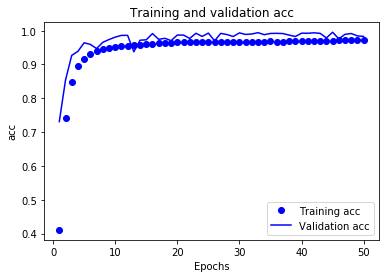

In [17]:
history_dict = history.history 

acc_values = history_dict ['acc'] 

val_acc_values = history_dict['val_acc']



plt.plot(epochs, acc_values, 'bo', label='Training acc') 

plt.plot(epochs, val_acc_values, 'b', label='Validation acc') 

plt.title('Training and validation acc') 

plt.xlabel('Epochs') 

plt.ylabel('acc') 

plt.legend()

plt.show()